In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
ls

 Volume in drive C is Acer
 Volume Serial Number is 6CA3-2EE7

 Directory of C:\Users\gokul\OneDrive\Documents\excelr\project\data

06-04-2022  07:27 PM    <DIR>          .
06-04-2022  07:27 PM    <DIR>          ..
06-04-2022  07:27 PM    <DIR>          .ipynb_checkpoints
16-03-2022  09:48 PM            14,850 Ecommerce project.docx
06-04-2022  12:24 PM         1,326,350 ecommerce updated.pptx
16-03-2022  09:48 PM            40,116 Ecommerce.csv
03-04-2022  09:27 PM           861,685 ecommerce.pptx
06-04-2022  07:27 PM                72 log transformation.ipynb
06-04-2022  07:26 PM         2,348,864 project.ipynb
03-04-2022  09:02 PM    <DIR>          scs
               6 File(s)      4,591,937 bytes
               4 Dir(s)  125,796,446,208 bytes free


In [4]:
data=pd.read_csv("Ecommerce.csv")

In [5]:
data.head()

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,1,32.538350,12.028846,35.850540,3.648854,576.098273
1,2,34.206718,12.226851,37.246443,1.987536,460.784955
2,3,31.535240,11.814341,36.610697,3.351191,349.739791
3,4,32.199577,11.295163,37.425695,5.234337,547.709921
4,5,33.570137,13.500972,36.856165,3.938603,487.055641


In [6]:
data_cleaned=data.drop("Customer ID",axis=1)

In [7]:
data_cleaned.head()

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,32.538350,12.028846,35.850540,3.648854,576.098273
1,34.206718,12.226851,37.246443,1.987536,460.784955
2,31.535240,11.814341,36.610697,3.351191,349.739791
3,32.199577,11.295163,37.425695,5.234337,547.709921
4,33.570137,13.500972,36.856165,3.938603,487.055641


In [8]:
data_cleaned.describe()

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
count,623.000000,623.000000,623.000000,623.000000,623.000000
mean,33.039429,12.001459,37.079018,3.514850,499.600023
std,0.949071,0.996609,0.991753,0.948063,80.032965
min,29.972300,9.273248,33.751071,0.891398,256.670000
25%,32.375680,11.334163,36.376725,2.906558,447.665160
50%,33.044399,11.998823,37.113631,3.504771,498.806136
75%,33.700947,12.647695,37.773880,4.140305,551.257208
max,35.744415,15.138317,40.808388,6.553916,775.337626


# log transformation of data

In [9]:
data_log=np.log(data_cleaned)

In [10]:
data_log.head()

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,3.482419,2.487308,3.579359,1.294413,6.356278
1,3.532422,2.503634,3.617556,0.686896,6.132931
2,3.451106,2.469314,3.600340,1.209316,5.857189
3,3.471953,2.424375,3.622357,1.655240,6.305746
4,3.513637,2.602762,3.607023,1.370826,6.188378


In [11]:
data_log.describe()

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
count,623.000000,623.000000,623.000000,623.000000,623.000000
mean,3.497289,2.481580,3.612694,1.216520,6.200713
std,0.028762,0.083223,0.026776,0.296562,0.163551
min,3.400274,2.227134,3.519012,-0.114964,5.547791
25%,3.477408,2.427821,3.593929,1.066970,6.104045
50%,3.497852,2.484809,3.613984,1.254125,6.212218
75%,3.517526,2.537475,3.631618,1.420769,6.312201
max,3.576394,2.717229,3.708888,1.880063,6.653299


# model buliding

# svm

In [12]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [17]:
x=data_log.iloc[:,:-1]
y=data_log.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [18]:
modelsvm= SVR()
modelsvm.fit(x_train,y_train)

SVR()

In [19]:
predt=modelsvm.predict(x_test)

In [20]:
metrics.mean_absolute_percentage_error(predt,y_test)

0.02142761243415977

In [21]:
metrics.mean_absolute_error(predt,y_test)

0.13308835137720224

## decision tree

In [26]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [24]:
x=data_log.iloc[:,:-1]
y=data_log.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [25]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [27]:
pred=model.predict(x_test)

In [28]:
metrics.mean_absolute_percentage_error(y_test,pred)

0.029399371753302574

In [29]:
metrics.mean_absolute_error(y_test,pred)

0.180817276375595

## random forest

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [33]:
x=data_log.iloc[:,:-1]
y=data_log.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [34]:
model2=RandomForestRegressor()
model2.fit(x_train,y_train)

RandomForestRegressor()

In [35]:
y_pred=model2.predict(x_test)

In [36]:
metrics.mean_absolute_percentage_error(y_test,y_pred)

0.025110160605777195

In [37]:
metrics.mean_absolute_error(y_pred,y_test)

0.15358339278780192

## bagging regression

In [39]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [40]:
x=data_log.iloc[:,:-1]
y=data_log.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [41]:
model4=BaggingRegressor()
model4.fit(x_train,y_train)

BaggingRegressor()

In [42]:
ypredict=model4.predict(x_test)

In [43]:
metrics.mean_absolute_percentage_error(y_test,ypredict)

0.025284748842295972

In [44]:
metrics.mean_absolute_error(ypredict,y_test)

0.15489415269653323

### linear regression

In [46]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [47]:
x=data_log.iloc[:,:-1]
y=data_log.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [48]:
modelLR=LinearRegression()
modelLR.fit(x_train,y_train)

LinearRegression()

In [49]:
pred=modelLR.predict(x_test)

In [50]:
metrics.mean_absolute_error(pred,y_test)

0.13498388378195877

In [51]:
metrics.mean_absolute_percentage_error(pred,y_test)

0.021749934223280875

# lasso ridge and elasticnet regression

In [52]:
from sklearn.linear_model import  Ridge
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet 

### ridge

In [53]:
x=data_log.iloc[:,:-1]
y=data_log.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [54]:
modelridge=Ridge()
modelridge.fit(x_train,y_train)

Ridge()

In [55]:
predict=modelridge.predict(x_test)

In [56]:
metrics.mean_absolute_percentage_error(predict,y_test)

0.021586559909223632

In [57]:
metrics.mean_absolute_error(predict,y_test)

0.13395841398607497

### lasso

In [59]:
modellasso = Lasso() 
modellasso.fit(x_train, y_train) 
y_predict= modellasso.predict(x_test) 

In [60]:
metrics.mean_absolute_error(y_predict,y_test)

0.133722067325468

In [61]:
metrics.mean_absolute_percentage_error(y_predict,y_test)

0.021548869789044495

### elasticnet

In [62]:
e_net = ElasticNet() 
e_net.fit(x_train, y_train) 

ElasticNet()

In [63]:
pred_y=e_net.predict(x_test)

In [64]:
metrics.mean_absolute_error(pred_y,y_test)

0.133722067325468

In [65]:
metrics.mean_absolute_percentage_error(pred_y,y_test)

0.021548869789044495

### multilinear regression

In [67]:
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [68]:
data1=data_log.rename({'Avg Session length':'avl','Time on App':'toa','Time on Website':'tow','Length of MemberShip':'lom','Yealy amount spent':'yas'},axis=1)

In [70]:
data1.head()

,avl,toa,tow,lom,yas
0,3.482419,2.487308,3.579359,1.294413,6.356278
1,3.532422,2.503634,3.617556,0.686896,6.132931
2,3.451106,2.469314,3.600340,1.209316,5.857189
3,3.471953,2.424375,3.622357,1.655240,6.305746
4,3.513637,2.602762,3.607023,1.370826,6.188378


In [71]:
data1.corr()

,avl,toa,tow,lom,yas
avl,1.000000,0.000459,0.051684,-0.022686,-0.050118
toa,0.000459,1.000000,0.044894,0.036019,-0.005707
tow,0.051684,0.044894,1.000000,0.042595,0.080077
lom,-0.022686,0.036019,0.042595,1.000000,-0.013338
yas,-0.050118,-0.005707,0.080077,-0.013338,1.000000


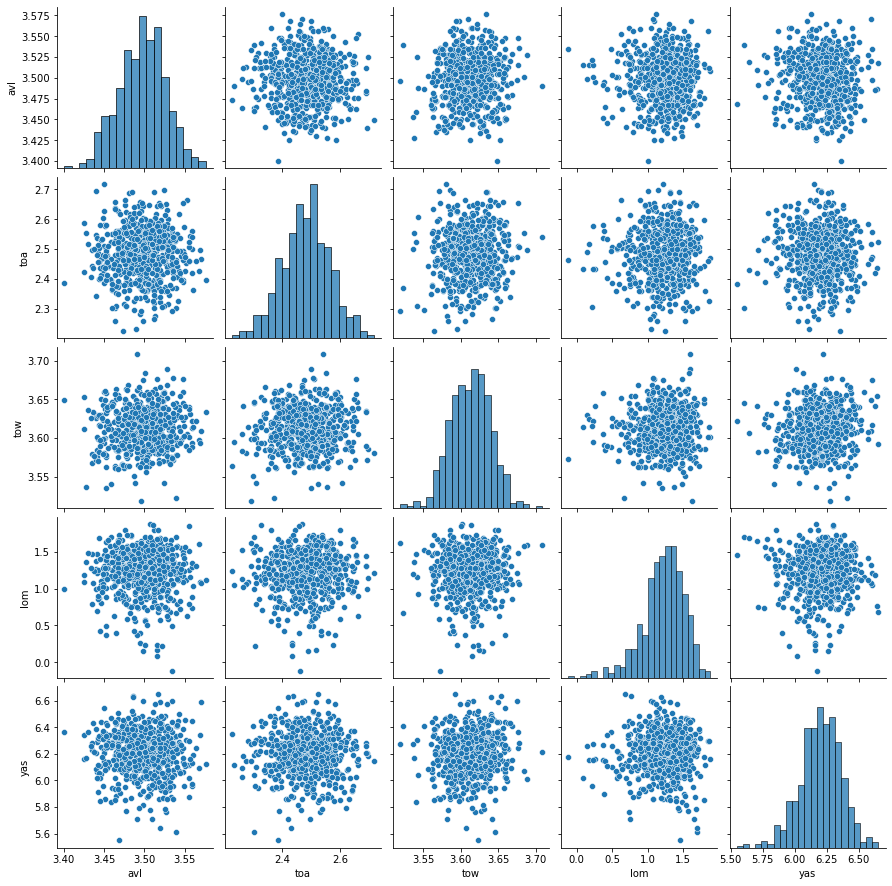

In [72]:
sns.pairplot(data1)

In [73]:
modelmul=smf.ols('yas~avl+toa+tow+lom',data=data1).fit()

In [74]:
modelmul.rsquared

0.00976983875058357

In [75]:
modelmul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    yas   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.524
Date:                Wed, 06 Apr 2022   Prob (F-statistic):              0.193
Time:                        19:46:47   Log-Likelihood:                 247.58
No. Observations:                 623   AIC:                            -485.2
Df Residuals:                     618   BIC:                            -463.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4916      1.170      4.692      0.000       3.193       7.790
avl           -0.3120      0.228     -1.368      0.172      -0.760       0.136
toa           -0.0173      0.079     -0.220      0.826      -0.172       0.137
tow            0.5135      0.245      2.093      0.037       0.032       0.995
lom           -0.0098      0.022     -0.445      0.656      -0.053       0.034
==============================================================================
Omnibus:                       22.018   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.629
Skew:                          -0.375   Prob(JB):                     1.65e-06
Kurtosis:                       3.681   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
modelmul.params

Intercept    5.491591
avl         -0.311972
toa         -0.017320
tow          0.513505
lom         -0.009842
dtype: float64

In [77]:
modelmul.tvalues,np.round(modelmul.pvalues,5)

(Intercept    4.692486
 avl         -1.368337
 toa         -0.219827
 tow          2.093384
 lom         -0.445018
 dtype: float64,
 Intercept    0.00000
 avl          0.17170
 toa          0.82608
 tow          0.03672
 lom          0.65646
 dtype: float64)

In [78]:
modelmul.rsquared,modelmul.rsquared_adj

(0.00976983875058357, 0.0033605820434676748)

##### simple linear model

In [80]:
modeltoa=smf.ols('yas~toa',data=data1).fit()

In [81]:
modeltoa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    yas   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.02023
Date:                Wed, 06 Apr 2022   Prob (F-statistic):              0.887
Time:                        19:48:01   Log-Likelihood:                 244.54
No. Observations:                 623   AIC:                            -485.1
Df Residuals:                     621   BIC:                            -476.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2285      0.196     31.810      0.000       5.844       6.613
toa           -0.0112      0.079     -0.142      0.887      -0.166       0.144
==============================================================================
Omnibus:                       22.481   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.067
Skew:                          -0.383   Prob(JB):                     1.33e-06
Kurtosis:                       3.676   Cond. No.                         86.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
modellom=smf.ols('yas~lom',data=data1).fit()

In [83]:
modellom.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    yas   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1105
Date:                Wed, 06 Apr 2022   Prob (F-statistic):              0.740
Time:                        19:48:20   Log-Likelihood:                 244.58
No. Observations:                 623   AIC:                            -485.2
Df Residuals:                     621   BIC:                            -476.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2097      0.028    224.120      0.000       6.155       6.264
lom           -0.0074      0.022     -0.332      0.740      -0.051       0.036
==============================================================================
Omnibus:                       21.814   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.904
Skew:                          -0.380   Prob(JB):                     2.37e-06
Kurtosis:                       3.649   Cond. No.                         8.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
modelall=smf.ols('yas~toa+lom',data=data1).fit()

In [85]:
modelall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    yas   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.06364
Date:                Wed, 06 Apr 2022   Prob (F-statistic):              0.938
Time:                        19:48:34   Log-Likelihood:                 244.59
No. Observations:                 623   AIC:                            -483.2
Df Residuals:                     620   BIC:                            -469.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2351      0.197     31.657      0.000       5.848       6.622
toa           -0.0103      0.079     -0.130      0.896      -0.165       0.145
lom           -0.0073      0.022     -0.327      0.744      -0.051       0.036
==============================================================================
Omnibus:                       21.934   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.097
Skew:                          -0.381   Prob(JB):                     2.15e-06
Kurtosis:                       3.653   Cond. No.                         95.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### vif

In [86]:
data1.columns

Index(['avl', 'toa', 'tow', 'lom', 'yas'], dtype='object')

In [87]:
rs_avl=smf.ols('avl~toa+tow+lom',data=data1).fit().rsquared
vif_avl=1/(1-rs_avl)

rs_toa=smf.ols('toa~avl+tow+lom',data=data1).fit().rsquared
vif_toa=1/(1-rs_toa)

rs_tow=smf.ols('tow~avl+toa+lom',data=data1).fit().rsquared
vif_tow=1/(1-rs_tow)

rs_lom=smf.ols('lom~avl+toa+tow',data=data1).fit().rsquared
vif_lom=1/(1-rs_lom)

d1={'variables':['avl','toa','tow','lom'],'vif':[vif_avl,vif_toa,vif_tow,vif_lom]}
vif_frame=pd.DataFrame(d1)


In [88]:
vif_frame

,variables,vif
0,avl,1.003304
1,toa,1.003192
2,tow,1.006507
3,lom,1.003611


In [89]:
data1["yas"]-modelmul.predict(data1.iloc[:,[0,1,2,3]])

0      0.168909
1     -0.064149
2     -0.351872
3      0.095493
4     -0.000705
         ...   
618    0.117372
619    0.044814
620    0.198443
621   -0.033833
622   -0.231681
Length: 623, dtype: float64

In [90]:
modelmul.resid

0      0.168909
1     -0.064149
2     -0.351872
3      0.095493
4     -0.000705
         ...   
618    0.117372
619    0.044814
620    0.198443
621   -0.033833
622   -0.231681
Length: 623, dtype: float64

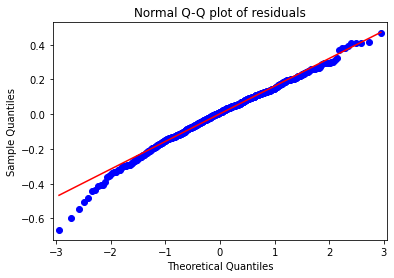

In [91]:
import statsmodels.api as sm
qqplot=sm.qqplot(modelmul.resid,line="q")
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [92]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

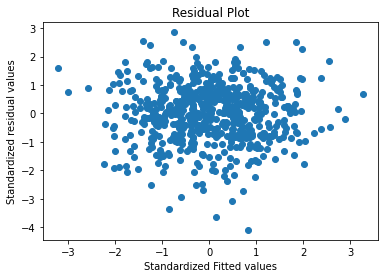

In [93]:
plt.scatter(get_standardized_values(modelmul.fittedvalues),
             get_standardized_values(modelmul.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [94]:
modelmul.fittedvalues

0      6.187369
1      6.197080
2      6.209061
3      6.210253
4      6.189084
         ...   
618    6.209755
619    6.199716
620    6.201342
621    6.202903
622    6.198211
Length: 623, dtype: float64

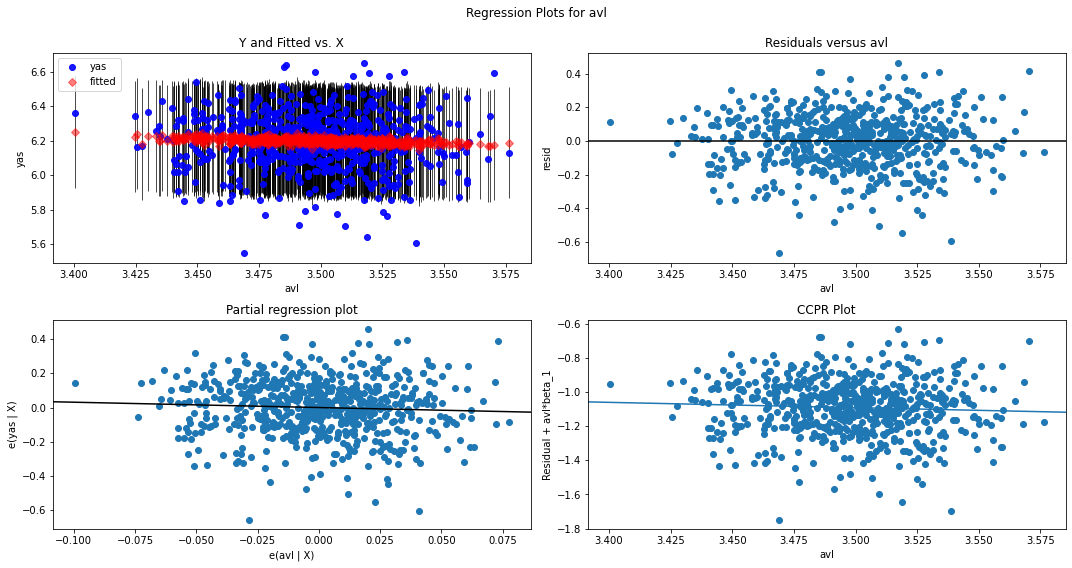

In [95]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(modelmul,"avl",fig=fig)



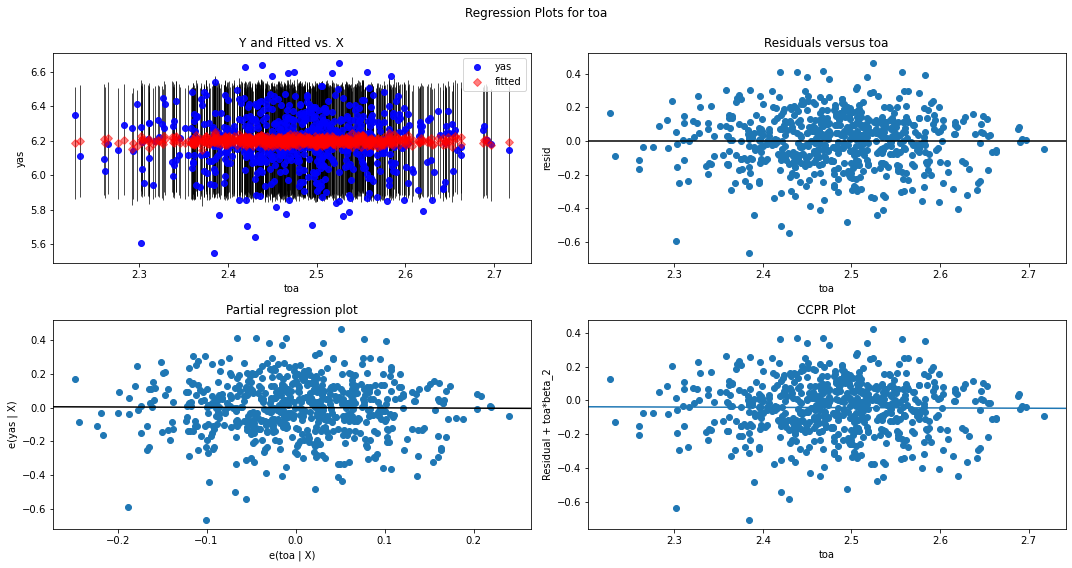

In [96]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(modelmul,"toa",fig=fig)


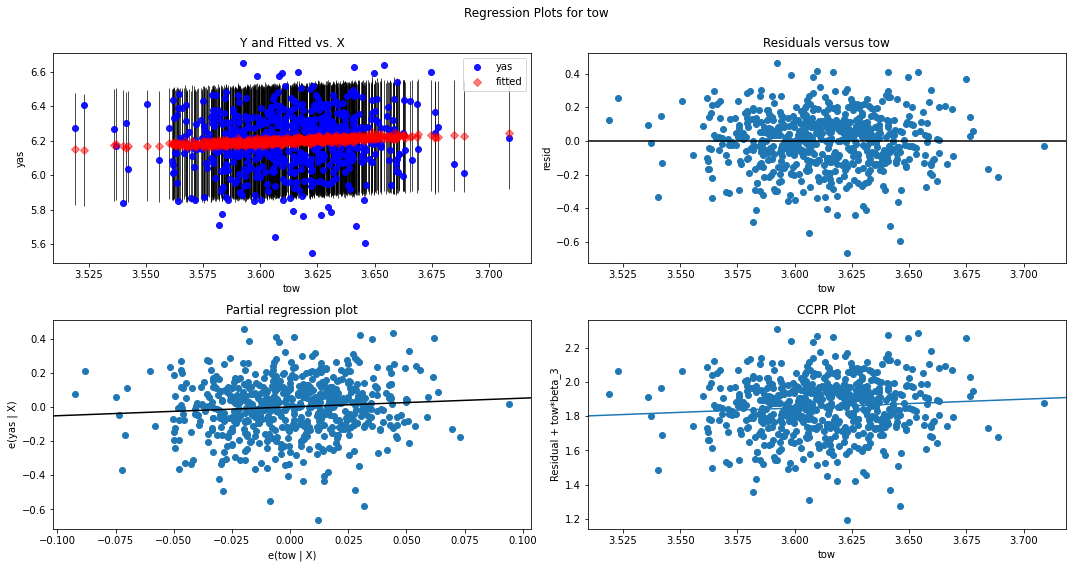

In [97]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(modelmul,"tow",fig=fig)



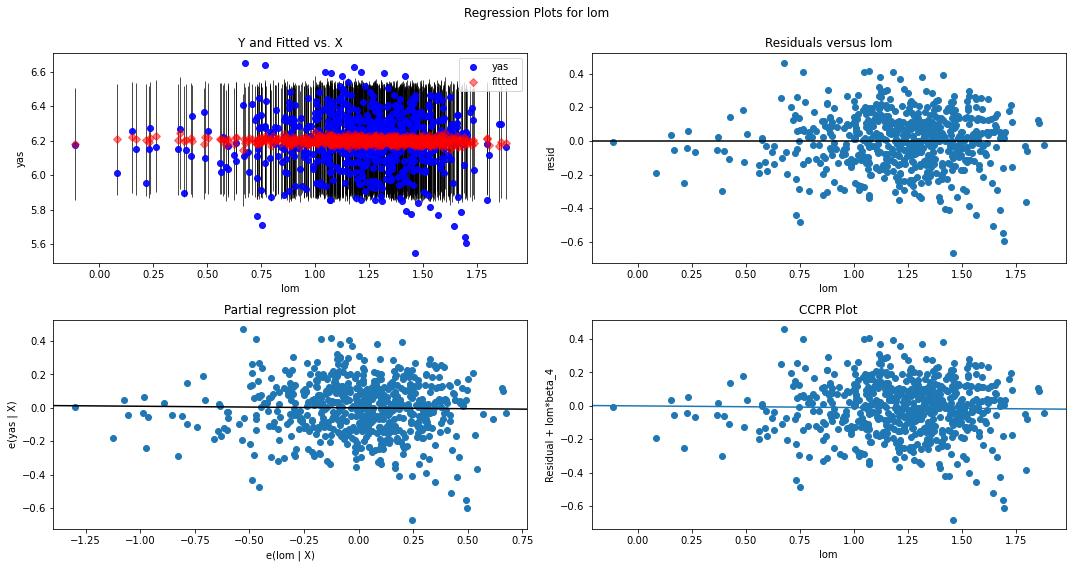

In [98]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(modelmul,"lom",fig=fig)


### model deletion diagnostics

In [99]:
model_influence = modelmul.get_influence()
(c, _) = model_influence.cooks_distance

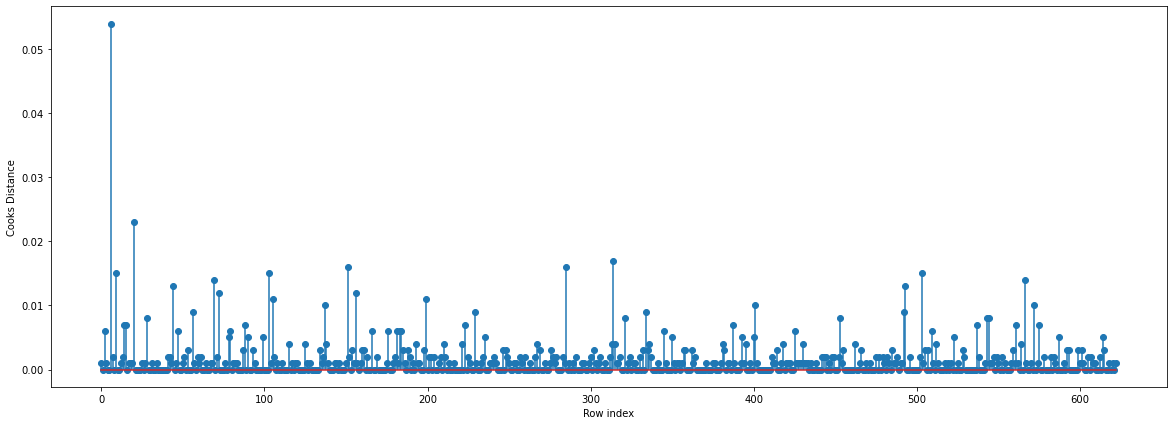

In [100]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [101]:
(np.argmax(c),np.max(c))

(6, 0.05390817386595053)

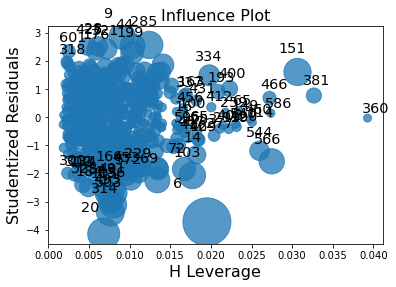

In [102]:
influence_plot(modelmul)
plt.show()

In [104]:
x=data1.iloc[:,:-1]
y=data1.iloc[:,-1:]

In [105]:
finalmodel=smf.ols('yas~avl+toa+tow+lom',data=data1).fit()

In [106]:
predy=finalmodel.predict(x)

In [107]:
finalmodel.rsquared

0.00976983875058357

In [108]:
metrics.mean_absolute_percentage_error(predy,y)

0.02048747018471837

In [109]:
metrics.mean_absolute_error(predy,y)

0.12702942685481342